In [28]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import sys

# Import data

In [29]:
df = pd.read_csv('medical_examination.csv')

In [30]:
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


# Add overweight column

In [34]:
overweight = (df['weight'] / ((df['height']/ 100 )**2) > 25).astype(int)

In [36]:
df['overweight'] = overweight

In [37]:
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,0
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,0


### Normalize data by making 0 always good and 1 always bad. If the value of 'cholestorol' or 'gluc' is 1, make the value 0. If the value is more than 1, make the value 1.

In [41]:
df['cholesterol'] = (df['cholesterol'] > 1).astype(int)

In [42]:
df['gluc'] = (df['gluc'] > 1).astype(int)

In [44]:
print(df['cholesterol'])

0        0
1        0
2        0
3        0
4        0
        ..
69995    0
69996    0
69997    0
69998    0
69999    0
Name: cholesterol, Length: 70000, dtype: int64


In [45]:
print(df['gluc'])

0        0
1        0
2        0
3        0
4        0
        ..
69995    0
69996    0
69997    0
69998    0
69999    0
Name: gluc, Length: 70000, dtype: int64


In [46]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
 13  overweight   70000 non-null  int64  
dtypes: float64(1), int64(13)
memory usage: 7.5 MB
None


# Draw Categorical Plot

In [55]:
# Create DataFrame for cat plot using `pd.melt` using just the values from 'cholesterol', 'gluc', 'smoke', 'alco', 'active', and 'overweight'.
df_cat = pd.melt(
    frame = df,
    id_vars = ['cardio'],
    value_vars = ['active', 'cholesterol', 'gluc', 'smoke', 'alco', 'overweight']
    )


In [57]:
print(df_cat)

       variable  value  cardio  total
0        active      0       0   6378
1        active      0       1   7361
2        active      1       0  28643
3        active      1       1  27618
4          alco      0       0  33080
5          alco      0       1  33156
6          alco      1       0   1941
7          alco      1       1   1823
8   cholesterol      0       0  35021
9   cholesterol      0       1  34979
10         gluc      0       0  35021
11         gluc      0       1  34979
12   overweight      0       0  15915
13   overweight      0       1  10539
14   overweight      1       0  19106
15   overweight      1       1  24440
16        smoke      0       0  31781
17        smoke      0       1  32050
18        smoke      1       0   3240
19        smoke      1       1   2929


In [58]:
# Group and reformat the data to split it by 'cardio'. Show the counts of each feature. You will have to rename one of the collumns for the catplot to work correctly.

df_cat = pd.DataFrame(
        df_cat.groupby(
                ['variable', 'value', 'cardio'])['value'].count()).rename(
                columns={'value': 'total'}).reset_index()

In [59]:
print(df_cat)

       variable  value  cardio  total
0        active      0       0      1
1        active      0       1      1
2        active      1       0      1
3        active      1       1      1
4          alco      0       0      1
5          alco      0       1      1
6          alco      1       0      1
7          alco      1       1      1
8   cholesterol      0       0      1
9   cholesterol      0       1      1
10         gluc      0       0      1
11         gluc      0       1      1
12   overweight      0       0      1
13   overweight      0       1      1
14   overweight      1       0      1
15   overweight      1       1      1
16        smoke      0       0      1
17        smoke      0       1      1
18        smoke      1       0      1
19        smoke      1       1      1


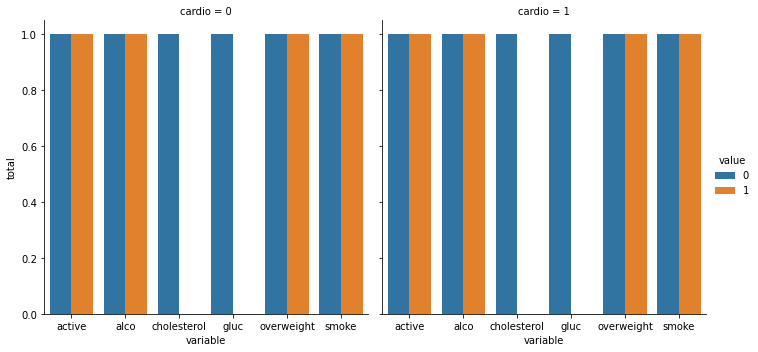

In [61]:
# Draw the catplot with 'sns.catplot()'
g = sns.catplot(
    x='variable',
    y='total',
    hue='value',
    col='cardio',
    data=df_cat,
    kind='bar')

fig = g.fig

In [66]:
# Do not modify the next two lines
    fig.savefig('catplot.png')
    return fig


IndentationError: unexpected indent (<ipython-input-66-957bc48e5111>, line 2)